In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("sensor_data_200.txt", delimiter=" ",
                  header=None, names=("data", "time", "ir", "lidar"))

d = data.loc[:, ["ir", "lidar"]]

,ir,lidar
ir,109.394583,-13.444661
lidar,-13.444661,23.408107


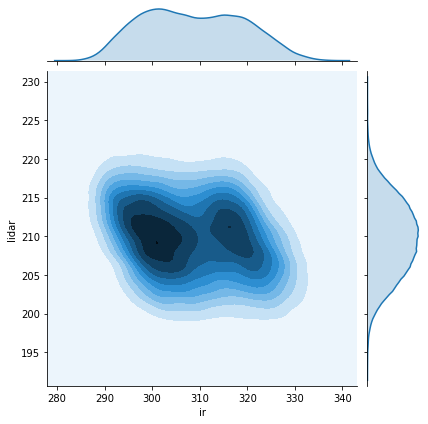

In [3]:
sns.jointplot(d["ir"], d["lidar"], d, kind="kde")
d.cov()

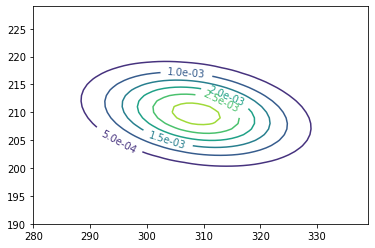

In [5]:
import numpy as np
from scipy.stats import multivariate_normal

x, y = np.mgrid[280:340, 190:230]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y

irlidar = multivariate_normal(mean=d.mean().values.T, cov=d.cov().values)
cont = plt.contour(x, y, irlidar.pdf(pos))
cont.clabel(fmt="%1.1e")

plt.show()